
# **UNDERSTANDING CORPORATE REPORTS ON AI AUTOMATION AND EMPLOYMENT**


# **Introduction**

The intersection of AI-driven automation and employment dynamics is reshaping workforce structures globally. With the continuous advancement of Generative AI and automation technologies, it has become increasingly important to understand their implications for job markets. These innovations are not only transforming traditional roles but also redefining the nature of work itself. Corporate reports offer a valuable perspective on how industries adapt to these changes, presenting insights into both challenges and opportunities that arise in this evolving landscape (Lane et al., 2023).

AI's impact on employment is multifaceted and sector-specific. Reports such as those by the OECD (Lane et al., 2023) underscore AI's potential to enhance efficiency by automating repetitive and hazardous tasks. Yet, these advancements also raise concerns about job displacement, wage compression, and growing skill mismatches. However, AI introduces significant opportunities for innovation, including augmented decision-making, streamlined operations, and increased demand for human-centric skills such as critical thinking, emotional intelligence, and collaboration. These dynamics highlight the pressing need for proactive workforce adaptation to balance the benefits of automation with employment stability.

The rapid adoption of generative AI and automation technologies has catalyzed a transformation in global workforce dynamics. Corporate reports from leading consultancies—Deloitte (Deloitte Digital, 2024; Deloitte, 2024), EY (EY, 2023), KPMG (KPMG, 2023; KPMG UK, 2023), McKinsey (McKinsey & Company, n.d.), and PwC (PwC, 2024; World Economic Forum & PwC, 2024)—provide critical insights into these changes. These reports not only explore trends and challenges related to Generative AI but also outline opportunities for workforce augmentation and corporate adaptation. Specifically, these reports serve as a valuable lens to understand:

- Key challenges posed by AI on labor markets: Including job displacement, widening skill gaps, and uneven adaptation across industries.
- Emerging opportunities: Highlighting the potential for workforce augmentation, productivity enhancements, and the need for strategic reskilling initiatives.
- Corporate strategies and policies: Examining how organizations mitigate these challenges while fostering sustainable and inclusive growth.

Given the widespread societal and economic impacts of AI automation, analyzing these themes is particularly relevant within the social sciences.

**Research Question:**
What are the dominant themes in corporate reports regarding the influence of AI-driven automation on employment?

**Hypothesis:**
AI-driven automation will reveal significant challenges such as job displacement and widening skill mismatches. However, it will also highlight transformative opportunities for workforce augmentation and reskilling initiatives, signaling a need for adaptive strategies by organizations.

**Methodology:**
This study employs a computational approach, integrating quantitative content analysis and natural language processing (NLP) techniques to analyze corporate reports on AI automation and employment. It builds on existing literature exploring the relationship between AI automation and labor markets, extending the understanding of these dynamics through a structured computational analysis. By leveraging NLP techniques such as tokenization and topic modeling, the study bridges technological advancements with social science inquiries (Kedia & Rasu, 2020).

The data collection process focuses on five publicly available industry reports from major consultancies: Deloitte (Deloitte Digital, 2024; Deloitte, 2024), EY (EY, 2023), KPMG (KPMG, 2023; KPMG UK, 2023), McKinsey (McKinsey & Company, n.d.), and PwC (PwC, 2024; World Economic Forum & PwC, 2024). Text data was extracted using Python’s pdfminer library and preprocessed for analysis through several stages, including tokenization, stopword removal, lemmatization, and noise removal. The preprocessed text was then transformed into bag-of-words and TF-IDF matrices for analysis.

Latent Dirichlet Allocation (LDA) was employed for topic modeling to identify dominant themes in the text data (Neuendorf, 2017). The model was optimized using coherence scores to ensure interpretability and reliability. Tools such as Python's PRAW library further facilitated data collection and structuring.

To ensure transparency, replicability, and alignment with academic standards, all analyses were conducted in a Python-based environment using Google Colab. The code and dataset are structured to enable independent validation and reproducibility, making this research a robust contribution to the intersection of technology and social science.

# **Downloading Text Data**


In this section, the process involves systematically preparing text for NLP analysis. The workflow begins with downloading corporate reports in PDF format from a designated online source. Using tools like PyPDF2, the content of these PDFs is extracted and cleaned by removing extraneous characters and whitespace. To maintain a standard format for further processing, only allowed characters are retained. The cleaned text is parsed into individual sentences using the spaCy library, ensuring sentences are of sufficient length to capture meaningful context. This prepared text is then saved into a structured format, such as a DataFrame, which serves as the foundation for subsequent analyses, including sentence-level insights and tokenization. This meticulous data preparation ensures consistency and accuracy in extracting insights from corporate reports​.

In [1]:
# Download the file using gdown
# https://drive.google.com/file/d/1NxrPpn9Pn1S1-eyhPw7XS1DLKeiBb2-G/view?usp=share_link
!rm -rf *.zip 2>/dev/null
!gdown https://drive.google.com/uc?id=1NxrPpn9Pn1S1-eyhPw7XS1DLKeiBb2-G
!unzip -q *.zip 2>/dev/null

Downloading...
From: https://drive.google.com/uc?id=1NxrPpn9Pn1S1-eyhPw7XS1DLKeiBb2-G
To: /content/Corporate-Reports-001.zip
100% 1.10M/1.10M [00:00<00:00, 12.7MB/s]


In [2]:
import os
import pandas as pd
import re
import string

!pip install PyPDF2
from PyPDF2 import PdfReader
import spacy


!python -m spacy download en_core_web_md

# Load the SpaCy English model
nlp = spacy.load('en_core_web_md')

# Directory containing the PDF files
directory = '/content/Corporate-Reports'

data = []
text_index = 1

# Allowed characters: alphabetic, punctuation, and whitespace
allowed_chars = set(string.ascii_letters + string.punctuation + string.whitespace)

# Traverse the directory and process PDF files
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.lower().endswith('.pdf'):  # Process only `.pdf` files
            file_path = os.path.join(root, file)
            folder_name = os.path.basename(root)

            # Read PDF content
            try:
                reader = PdfReader(file_path)
                raw_text = ""
                for page in reader.pages:
                    raw_text += page.extract_text() + "\n"
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                continue

            # Keep only allowed characters
            clean_text = ''.join(c for c in raw_text if c in allowed_chars)

            # Replace sequences of whitespace with a single space
            clean_text = re.sub(r'\s+', ' ', clean_text)

            # Trim leading and trailing whitespace
            clean_text = clean_text.strip()

            # Process the clean text to identify sentences
            doc = nlp(clean_text)

            sentence_index = 1
            for sent in doc.sents:
                sentence_text = sent.text.strip()  # Trim leading and trailing spaces

                # Check if the sentence exceeds five words
                if len(sentence_text.split()) > 5:
                    data.append({
                        'text_index': text_index,
                        'folder_name': folder_name,
                        'sentence_index': sentence_index,
                        'sentence_text': sentence_text
                    })
                    sentence_index += 1

            text_index += 1

# Create a DataFrame for sentences
df_sentences = pd.DataFrame(data, columns=['text_index', 'folder_name', 'sentence_index', 'sentence_text'])

# Save the DataFrame to a CSV file
output_path = '/content/df_sentences.csv'
df_sentences.to_csv(output_path, index=False)

print(f"Sentences DataFrame saved to {output_path}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 14.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Sentences DataFrame saved to /content/df_sentences.csv


In [3]:
# for more languages, check https://spacy.io/models
!python -m spacy download en_core_web_md >/dev/null 2>&1

# **Split Text Into Sentences**


This section of the project outlines the process of dividing large text data into individual sentences for analytical purposes. Using Python's spaCy library, the workflow begins by traversing directories containing PDF files, extracting textual content, and cleaning it to ensure quality. Each sentence is then processed, ensuring that it meets the criteria of having more than five words, which ensures meaningful units of analysis. The resulting sentences are stored in a structured DataFrame, facilitating subsequent analysis. This systematic segmentation enables precise linguistic and thematic evaluations, forming a foundational step in natural language processing workflows. The method's robustness is crucial for identifying patterns and insights from complex textual data.

In [4]:
## Split text into sentences
import os
import pandas as pd
import re
import spacy
from PyPDF2 import PdfReader

# Load the spaCy English model
nlp = spacy.load('en_core_web_md')

# Directory containing the PDF files
directory = '/content/Corporate-Reports'

data = []
text_index = 1

# Traverse the directory and process PDF files
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.lower().endswith('.pdf'):  # Only process `.pdf` files
            file_path = os.path.join(root, file)
            folder_name = os.path.basename(root)

            # Read PDF content
            try:
                reader = PdfReader(file_path)
                raw_text = ""
                for page in reader.pages:
                    raw_text += page.extract_text() + "\n"
            except Exception as e:
                print(f"Error reading {file_path}: {e}")
                continue

            # Clean the text
            clean_text = re.sub(r'\s+', ' ', raw_text).strip()

            # Process the clean text to identify sentences
            doc = nlp(clean_text)

            sentence_index = 1
            for sent in doc.sents:
                sentence_text = sent.text.strip()  # Trim leading and trailing spaces

                # Check if the sentence exceeds five words
                if len(sentence_text.split()) > 5:
                    data.append({
                        'text_index': text_index,
                        'folder_name': folder_name,
                        'sentence_index': sentence_index,
                        'sentence_text': sentence_text
                    })
                    sentence_index += 1

            text_index += 1

# Create the DataFrame
df_sentences = pd.DataFrame(data, columns=['text_index', 'folder_name', 'sentence_index', 'sentence_text'])

# Save the DataFrame to a TSV file
output_path = '/content/df_sentences.tsv'
df_sentences.to_csv(output_path, sep='\t', index=False)

print(f"Sentences DataFrame saved to {output_path}")

Sentences DataFrame saved to /content/df_sentences.tsv


# **Split Sentences Into Tokens**

In this section, the process involves breaking down sentences into individual tokens to facilitate detailed text analysis. Using the spaCy library, sentences are parsed to extract meaningful tokens while filtering out irrelevant elements like stopwords, non-alphabetic characters, and out-of-vocabulary terms. Each token is annotated with attributes such as its lemma (base form), part of speech, and entity type, if applicable. This structured representation enables advanced computational tasks like topic modeling, sentiment analysis, or entity recognition, allowing for a granular understanding of textual data while preserving linguistic context. The output is stored in a tabular format, supporting downstream analyses and ensuring replicability.

In [5]:
## Split sentences into tokens
import pandas as pd
import spacy
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load the spaCy English model
nlp = spacy.load('en_core_web_md')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Load the DataFrame containing sentences
df_sentences = pd.read_csv('/content/df_sentences.tsv', sep='\t')

data = []

# Process each row in the sentences DataFrame
for idx, row in df_sentences.iterrows():
    text_index = row['text_index']
    folder_name = row['folder_name']
    sentence_index = row['sentence_index']
    sentence_text = row['sentence_text']

    # Process the sentence with SpaCy
    doc = nlp(sentence_text)

    token_index = 1
    for token in doc:
        # Exclude tokens that:
        # - Are not alphabetic
        # - Are stopwords
        # - Are out-of-vocabulary (OOV)
        # - Do not have a vector
        if (
            token.is_alpha and
            token.text.lower() not in stop_words and
            not token.is_oov and
            token.has_vector
        ):
            token_text = token.text
            token_lemma = token.lemma_
            token_pos = token.pos_
            token_entity = token.ent_type_ if token.ent_type_ else 'O'  # 'O' for no entity

            data.append({
                'text_index': text_index,
                'folder_name': folder_name,
                'sentence_index': sentence_index,
                'token_index': token_index,
                'token_text': token_text,
                'token_lemma': token_lemma,
                'token_pos': token_pos,
                'token_entity': token_entity
            })

            token_index += 1

# Create the DataFrame
df_tokens = pd.DataFrame(data, columns=[
    'text_index', 'folder_name', 'sentence_index',
    'token_index', 'token_text', 'token_lemma', 'token_pos', 'token_entity'
])

# Save the DataFrame to a TSV file
output_path = '/content/df_tokens.tsv'
df_tokens.to_csv(output_path, sep='\t', index=False)

print(f"Tokens DataFrame saved to {output_path}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Tokens DataFrame saved to /content/df_tokens.tsv


In [6]:
df_tokens.head()

,text_index,folder_name,sentence_index,token_index,token_text,token_lemma,token_pos,token_entity
0,1,Corporate-Reports,1,1,AI,AI,PROPN,O
1,1,Corporate-Reports,1,2,affect,affect,VERB,O
2,1,Corporate-Reports,1,3,jobs,job,NOUN,O
3,1,Corporate-Reports,1,4,skills,skill,NOUN,O
4,1,Corporate-Reports,1,5,wages,wage,NOUN,O


In [7]:
df_tokens.shape

(20143, 8)

# **Sample Sentences From Token Dataframe**


This process utilizes a tokenized dataframe generated earlier, where tokens are annotated with their linguistic properties. By regrouping tokens into sentences and filtering them based on token count, the study ensures that only sentences with meaningful analytical value are selected. This step creates a balanced dataset of intermediate complexity, bridging raw token data and advanced modeling tasks like topic analysis or sentiment classification. The resulting sentences, stored in a dataframe, lay the groundwork for further computational analysis while retaining the semantic context necessary for nuanced exploration.

In [8]:
import pandas as pd

# Load the tokens DataFrame
df_tokens = pd.read_csv('/content/df_tokens.tsv', sep='\t')  # Update the path if needed

# Group the tokens back into sentences using token_lemma
grouped = df_tokens.groupby(['folder_name', 'sentence_index'])['token_lemma'].apply(' '.join).reset_index()

# Add a token count column
grouped['token_count'] = grouped['token_lemma'].apply(lambda x: len(x.split()))

# Filter for sentences with a token count between 5 and 10
filtered = grouped[(grouped['token_count'] >= 5) & (grouped['token_count'] <= 10)]

# Display available folder names
unique_folders = filtered['folder_name'].unique()
print("Available folder names in the data:", unique_folders)

# Sample sentences dynamically for each folder
sampled_sentences = {}
for folder in unique_folders:
    folder_filtered = filtered[filtered['folder_name'] == folder]
    if not folder_filtered.empty:
        sampled_sentences[folder] = (
            folder_filtered
            .sample(3, replace=True, random_state=43)['token_lemma']  # Set random_state for reproducibility
            .apply(str.lower)
            .tolist()
        )
    else:
        sampled_sentences[folder] = []  # Handle empty folders gracefully

# Output the sampled sentences for each folder
for folder, sentences in sampled_sentences.items():
    print(f"Sampled sentences for {folder}: {sentences}")

Available folder names in the data: ['Corporate-Reports']
Sampled sentences for Corporate-Reports: ['use case identify bottom approach engage stakeholder', 'continuous skill development keep workforce agile adaptable future technological advancement', 'contradict mission organization reduce environmental footprint']


# **Create Document-Term Matrix Corpus Model**


This section describes transforming textual data into a structured representation suitable for analysis, particularly for NLP tasks. It involves tokenizing sentences into words and creating a dictionary to map unique tokens (words) to indices. Using the Bag of Words (BoW) approach, each sentence is represented as a sparse vector containing the frequency of words. These vectors are then converted into a dense document-term matrix (DTM), where rows correspond to unique terms and columns to sentences, and each cell represents the frequency of a term in a given sentence. This matrix serves as the foundation for various analytical techniques, such as identifying term importance, clustering, or topic modelling. It provides a structured means to extract meaningful patterns from unstructured text data.

In [9]:
from gensim.corpora import Dictionary
from gensim.matutils import sparse2full
import pandas as pd

# List of sampled sentences from your dataset
sentences = sampled_sentences['Corporate-Reports'] # Replace with the key for your specific folder

# Tokenize sentences
tokenized_sentences = [sentence.split() for sentence in sentences]

# Create a Gensim dictionary
dictionary = Dictionary(tokenized_sentences)

# Create Bag of Words (BoW) representation
corpus = [dictionary.doc2bow(sentence) for sentence in tokenized_sentences]

# Convert BoW to a dense document-term matrix
dt_matrix = pd.DataFrame(
    [sparse2full(doc, len(dictionary)) for doc in corpus],
    columns=[dictionary[idx] for idx in range(len(dictionary))]
).T

# Set document identifiers as column names
dt_matrix.columns = [f"Sentence_{i+1}" for i in range(len(sentences))]

# Output the document-term matrix
print(dt_matrix)

               Sentence_1  Sentence_2  Sentence_3
approach              1.0         0.0         0.0
bottom                1.0         0.0         0.0
case                  1.0         0.0         0.0
engage                1.0         0.0         0.0
identify              1.0         0.0         0.0
stakeholder           1.0         0.0         0.0
use                   1.0         0.0         0.0
adaptable             0.0         1.0         0.0
advancement           0.0         1.0         0.0
agile                 0.0         1.0         0.0
continuous            0.0         1.0         0.0
development           0.0         1.0         0.0
future                0.0         1.0         0.0
keep                  0.0         1.0         0.0
skill                 0.0         1.0         0.0
technological         0.0         1.0         0.0
workforce             0.0         1.0         0.0
contradict            0.0         0.0         1.0
environmental         0.0         0.0         1.0


# **Token Saliency with TF-IDF Measure**

This section outlines a method to identify the most important terms within a set of documents. By employing Term Frequency-Inverse Document Frequency (TF-IDF), the analysis emphasizes words that are frequent within a specific document but rare across the corpus, providing a nuanced understanding of their contextual relevance. A Gensim dictionary and corpus are created from tokenized sentences, and a TF-IDF model is applied to compute weights for each term. These weights are organized into a document-term matrix, facilitating insights into the distinctive language and key themes across the analyzed text. This approach is essential for prioritizing content that holds unique significance within individual documents, enhancing the interpretability of textual datasets.

In [10]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.matutils import sparse2full
import pandas as pd

# The `sampled_sentences` dictionary is assumed to be created in the earlier section of the script.
# Flatten the `sampled_sentences` dictionary into a single list of sentences
all_sentences = [sentence for sentences in sampled_sentences.values() for sentence in sentences]

# Ensure the list is not empty
if all_sentences:
    # Tokenize sentences (split each sentence into words)
    tokenized_sentences = [sentence.split() for sentence in all_sentences]

    # Create a Gensim dictionary from tokenized sentences
    dictionary = Dictionary(tokenized_sentences)

    # Create Bag of Words (BoW) representation for each sentence
    corpus = [dictionary.doc2bow(sentence) for sentence in tokenized_sentences]

    # Create a TF-IDF model from the BoW corpus
    tfidf_model = TfidfModel(corpus)

    # Transform the corpus to TF-IDF weights
    tfidf_corpus = [tfidf_model[doc] for doc in corpus]

    # Convert TF-IDF weights to a dense document-term matrix
    dt_matrix = pd.DataFrame(
        [sparse2full(doc, len(dictionary)) for doc in tfidf_corpus],
        columns=[dictionary[idx] for idx in range(len(dictionary))]
    ).T

    # Set document identifiers as column names
    dt_matrix.columns = [f"Sentence_{i+1}" for i in range(len(all_sentences))]

    # Display the TF-IDF document-term matrix
    print("TF-IDF Document-Term Matrix:")
    print(dt_matrix)
else:
    print("No sentences available to process in `sampled_sentences`.")

TF-IDF Document-Term Matrix:
               Sentence_1  Sentence_2  Sentence_3
approach         0.377964    0.000000    0.000000
bottom           0.377964    0.000000    0.000000
case             0.377964    0.000000    0.000000
engage           0.377964    0.000000    0.000000
identify         0.377964    0.000000    0.000000
stakeholder      0.377964    0.000000    0.000000
use              0.377964    0.000000    0.000000
adaptable        0.000000    0.316228    0.000000
advancement      0.000000    0.316228    0.000000
agile            0.000000    0.316228    0.000000
continuous       0.000000    0.316228    0.000000
development      0.000000    0.316228    0.000000
future           0.000000    0.316228    0.000000
keep             0.000000    0.316228    0.000000
skill            0.000000    0.316228    0.000000
technological    0.000000    0.316228    0.000000
workforce        0.000000    0.316228    0.000000
contradict       0.000000    0.000000    0.408248
environmental    0.00

# **Recreate Texts from Normalized Tokens**

This section illustrates the process of rebuilding meaningful textual representations from preprocessed tokens, ensuring the analysis remains rooted in its original context. After breaking down sentences into normalized tokens using techniques like lemmatization and filtering, the tokens are grouped back into coherent sentences or longer text segments. This step provides a more streamlined and interpretable dataset for subsequent analysis, enabling a balance between data normalization and retaining the essence of the source material. The reconstructed texts serve as the foundation for deeper analysis, such as sentiment evaluation or topic modeling, while ensuring the semantic integrity of the data remains intact.

In [11]:
import pandas as pd

# Load the tokens DataFrame
df_tokens = pd.read_csv('/content/df_tokens.tsv', sep='\t')  # Update the path if needed

# Ensure 'token_lemma' column contains only strings and replace NaN with empty strings
df_tokens['token_lemma'] = df_tokens['token_lemma'].fillna('').astype(str)

# Group the tokens back into sentences using token_lemma
grouped = df_tokens.groupby(['folder_name', 'text_index', 'sentence_index'])['token_lemma'].apply(' '.join).reset_index()

# Calculate the number of sentences per text
sentence_counts = grouped.groupby(['folder_name', 'text_index']).size().reset_index(name='sentence_count')

# Calculate the total number of tokens per text
grouped['token_count'] = grouped['token_lemma'].apply(lambda x: len(x.split()))
token_counts = grouped.groupby(['folder_name', 'text_index'])['token_count'].sum().reset_index()

# Concatenate all token_lemma values into a single text per text_index
grouped['lowercased_sentence'] = grouped['token_lemma'].apply(str.lower)
concatenated_texts = (
    grouped.groupby(['folder_name', 'text_index'])['lowercased_sentence']
    .apply(lambda x: ' '.join(x))
    .reset_index(name='concatenated_text')
)

# Merge sentence and token counts with concatenated texts
text_df = pd.merge(sentence_counts, token_counts, on=['folder_name', 'text_index'])
text_df = pd.merge(text_df, concatenated_texts, on=['folder_name', 'text_index'])

# Final DataFrame: folder_name, text_index, sentence_count, token_count, concatenated_text
print("Processed Text DataFrame:")
print(text_df)

Processed Text DataFrame:
         folder_name  text_index  sentence_count  token_count  \
0  Corporate-Reports           1             175         2636   
1  Corporate-Reports           2             209         3119   
2  Corporate-Reports           3             499         6885   
3  Corporate-Reports           4              98         1462   
4  Corporate-Reports           5             144         1973   
5  Corporate-Reports           6             270         4068   

                                   concatenated_text  
0  ai affect job skill wage productivity pwc ai j...  
1  generative ai uk labour market executive summa...  
2  leverage generative ai job augmentation workfo...  
3  artificial intelligence augment people center ...  
4  ai automation future work ten thing solve auto...  
5  ai cut cost cost workforce experience two deca...  


# **Wordcloud Using All Text Data**

In this section, the analysis focuses on summarizing the collective insights derived from the text data in a visually engaging manner. By creating a word cloud, frequently occurring terms across all processed reports are highlighted, offering an at-a-glance understanding of the most salient topics discussed in the context of AI-driven automation and employment. This visualization aids in identifying dominant themes and key priorities, such as "AI," "upskilling," and "technology," emphasizing the recurring focus on these areas across the analyzed data. The word cloud serves as a preliminary step in the broader analytical process, providing a foundation for deeper exploration of themes and trends.

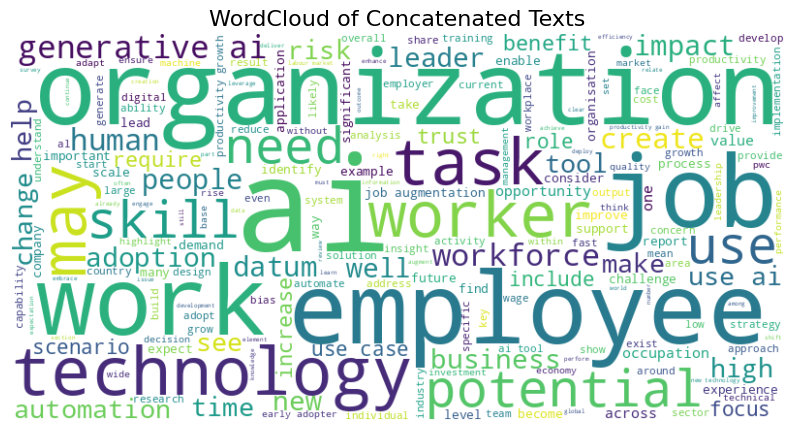

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load the tokens DataFrame
df_tokens = pd.read_csv('/content/df_tokens.tsv', sep='\t')  # Update the path if needed

# Ensure 'token_lemma' column contains only strings and replace NaN with empty strings
df_tokens['token_lemma'] = df_tokens['token_lemma'].fillna('').astype(str)

# Group the tokens back into sentences using token_lemma
grouped = df_tokens.groupby(['folder_name', 'text_index', 'sentence_index'])['token_lemma'].apply(' '.join).reset_index()

# Calculate the number of sentences per text
sentence_counts = grouped.groupby(['folder_name', 'text_index']).size().reset_index(name='sentence_count')

# Calculate the total number of tokens per text
grouped['token_count'] = grouped['token_lemma'].apply(lambda x: len(x.split()))
token_counts = grouped.groupby(['folder_name', 'text_index'])['token_count'].sum().reset_index()

# Concatenate all token_lemma values into a single text per text_index
grouped['lowercased_sentence'] = grouped['token_lemma'].apply(str.lower)
concatenated_texts = (
    grouped.groupby(['folder_name', 'text_index'])['lowercased_sentence']
    .apply(lambda x: ' '.join(x))
    .reset_index(name='concatenated_text')
)

# Merge sentence and token counts with concatenated texts
text_df = pd.merge(sentence_counts, token_counts, on=['folder_name', 'text_index'])
text_df = pd.merge(text_df, concatenated_texts, on=['folder_name', 'text_index'])

# Combine all the text from the concatenated_text column
all_text = ' '.join(text_df['concatenated_text'].fillna(''))

# Create a WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Concatenated Texts", fontsize=16)
plt.show()

# **Topic Modelling Using All Text Data**


This section describes the implementation of LDA to uncover dominant themes in the compiled corporate reports. The methodology involves tokenizing text data, creating a Gensim dictionary, and representing the text corpus in a bag-of-words format. LDA models are applied to extract latent topics, and coherence scores guide the selection of the optimal number of topics. Key findings from this process include the identification of themes such as workforce augmentation, AI-driven upskilling, and strategies for adaptation. Visualizations, like intertopic distance maps and word distributions, enhance interpretability, offering a nuanced understanding of how AI influences labor market dynamics. This analysis highlights a focus on collaborative human-AI workflows and emphasizes the importance of both technical and human-centric skills.

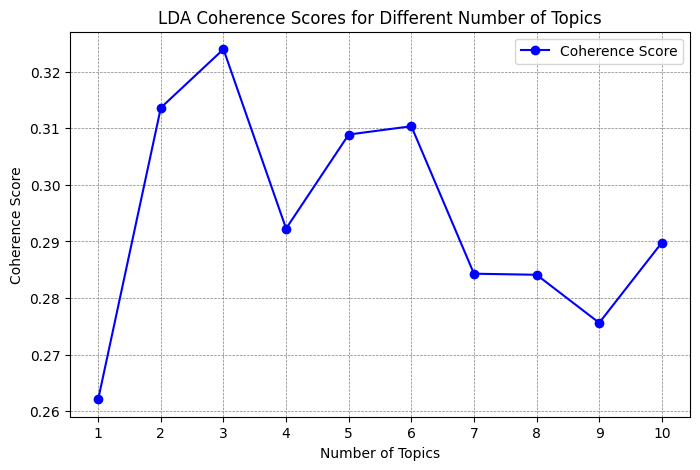

In [13]:
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize the concatenated_text column
text_df['tokenized_text'] = text_df['concatenated_text'].apply(lambda x: x.split())

# Create a Gensim dictionary and corpus
dictionary = Dictionary(text_df['tokenized_text'])
corpus = [dictionary.doc2bow(text) for text in text_df['tokenized_text']]

# Iterate over different values for num_topics and calculate coherence
coherence_scores = []
topic_range = range(1, 11)

for num_topics in topic_range:
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)
    coherence_model = CoherenceModel(model=lda_model, texts=text_df['tokenized_text'], dictionary=dictionary, coherence='c_v')
    coherence_scores.append(coherence_model.get_coherence())

# Plot the coherence measures
plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_scores, marker='o', color='blue', label='Coherence Score')
plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, axis='both')
plt.title('LDA Coherence Scores for Different Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_range)
plt.legend()
plt.show()

In [14]:
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer

# Split concatenated text into tokenized lists
text_df['tokenized_text'] = text_df['concatenated_text'].apply(lambda x: x.split())

# Create a Gensim dictionary and corpus
dictionary = Dictionary(text_df['tokenized_text'])
corpus = [dictionary.doc2bow(text) for text in text_df['tokenized_text']]

# LDA Model
num_topics = 3  # Adjust the number of topics as needed
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Display the top words in each topic
topics = lda_model.print_topics(num_words=10)
for topic_id, topic_words in topics:
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.037*"ai" + 0.020*"task" + 0.015*"generative" + 0.013*"impact" + 0.010*"technology" + 0.010*"could" + 0.009*"use" + 0.009*"may" + 0.007*"work" + 0.007*"productivity"
Topic 1: 0.024*"organization" + 0.013*"job" + 0.013*"workforce" + 0.012*"use" + 0.010*"productivity" + 0.009*"employee" + 0.008*"may" + 0.008*"augmentation" + 0.007*"potential" + 0.007*"technology"
Topic 2: 0.042*"ai" + 0.011*"use" + 0.011*"job" + 0.011*"employee" + 0.010*"skill" + 0.010*"work" + 0.008*"leader" + 0.008*"human" + 0.007*"new" + 0.007*"need"


In [15]:
# Optionally, convert corpus to a matrix for CountVectorizer output
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_df['concatenated_text'])
count_vectorized_terms = vectorizer.get_feature_names_out()

# Optional: Save vectorized terms and corpus for further analysis
text_df['lda_topics'] = [lda_model.get_document_topics(bow) for bow in corpus]

# Example output for topics per document
text_df[['folder_name', 'text_index', 'lda_topics']]

,folder_name,text_index,lda_topics
0,Corporate-Reports,1,"[(2, 0.9997165)]"
1,Corporate-Reports,2,"[(0, 0.9997515)]"
2,Corporate-Reports,3,"[(1, 0.9998876)]"
3,Corporate-Reports,4,"[(2, 0.9917832)]"
4,Corporate-Reports,5,"[(2, 0.9995967)]"
5,Corporate-Reports,6,"[(2, 0.99943703)]"


In [16]:
!pip install pyLDAvis >/dev/null 2>&1

In [17]:
import pandas as pd
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models

# Split concatenated text into tokenized lists
text_df['tokenized_text'] = text_df['concatenated_text'].apply(lambda x: x.split())

# Create a Gensim dictionary and corpus
dictionary = Dictionary(text_df['tokenized_text'])
corpus = [dictionary.doc2bow(text) for text in text_df['tokenized_text']]

# LDA Model
num_topics = 3  # Adjust the number of topics as needed
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Visualize the LDA model results using PyLDAvis
pyLDAvis.enable_notebook()  # Use this in Jupyter Notebook to render the visualization
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)  # Displays in Notebook

## Topic-Keyword Distribution

This section focuses on identifying and summarizing the top 3 keywords associated with the dominant topics extracted through topic modeling, such as LDA. This analysis highlights the core themes discussed in the corporate reports by grouping related keywords under specific topics. These distributions are crucial for understanding the primary narratives and key areas of emphasis in the reports, such as automation, workforce transformation, and skill development. Visualizations like bar charts or word clouds often accompany this section, making it easier to interpret the relationships between topics and their corresponding keywords.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


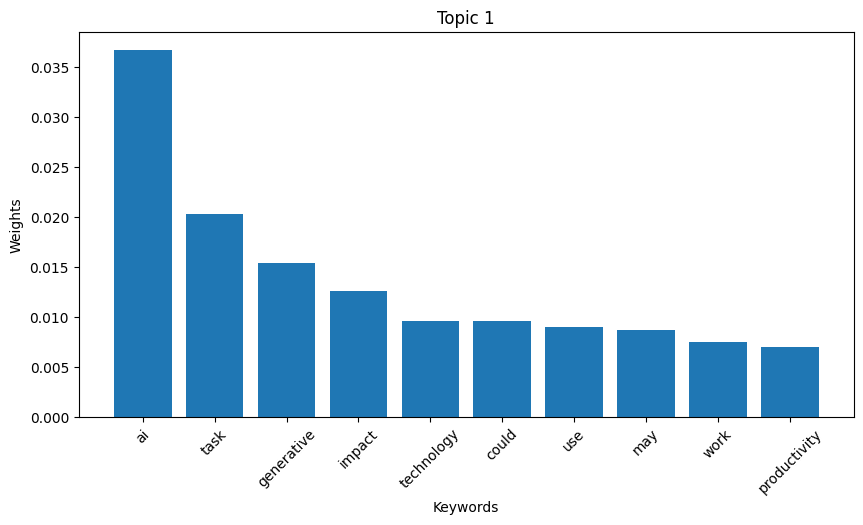

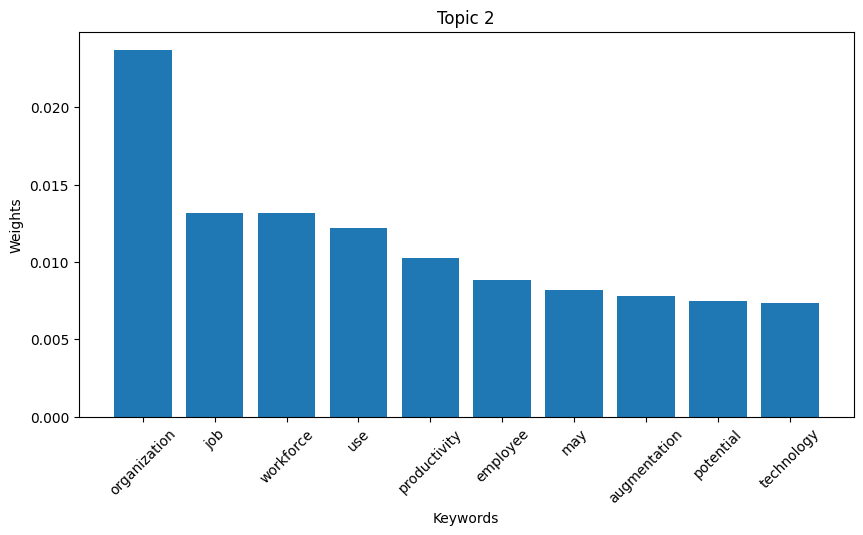

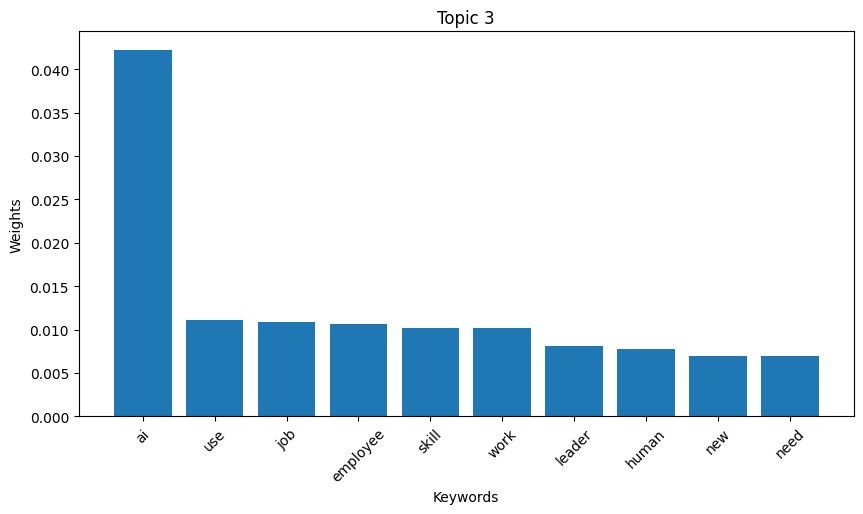

In [18]:
import matplotlib.pyplot as plt

# Extract topics and their weights
topics = lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False)

# Prepare data for plotting
topic_keywords = {f"Topic {i+1}": [word for word, _ in topic] for i, topic in topics}

# Plot bar charts for each topic
for topic, keywords in topic_keywords.items():
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(keywords)), [weight for _, weight in topics[int(topic.split()[1]) - 1][1]], tick_label=keywords)
    plt.title(topic)
    plt.xlabel("Keywords")
    plt.ylabel("Weights")
    plt.xticks(rotation=45)
    plt.show()


## Dominant Topic per Document

This section highlights the most prevalent topic within each analyzed document, based on the results of topic modeling. This analysis assigns a single dominant topic to each report, allowing for a clearer understanding of the primary focus or narrative of individual documents. By summarizing the central themes of each report, this section provides insights into how different organizations prioritize and address issues related to AI-driven automation and employment. Visual aids such as tables or charts are often used to display the dominant topics, enhancing interpretability and comparison across documents.

In [19]:
# Find the dominant topic and its percentage contribution for each document
dominant_topics = [
    max(lda_model.get_document_topics(doc), key=lambda x: x[1]) for doc in corpus
]

# Create a DataFrame
dominant_topics_df = pd.DataFrame(dominant_topics, columns=['Topic', 'Contribution'])
dominant_topics_df['Document_ID'] = range(len(dominant_topics_df))

# Merge with original text
dominant_topics_df = dominant_topics_df.merge(text_df[['concatenated_text']], left_on='Document_ID', right_index=True)

# Display top insights
dominant_topics_df.sort_values(by="Contribution", ascending=False).head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,Contribution,Document_ID,concatenated_text
2,1,0.999888,2,leverage generative ai job augmentation workfo...
1,0,0.999751,1,generative ai uk labour market executive summa...
0,2,0.999716,0,ai affect job skill wage productivity pwc ai j...
4,2,0.999597,4,ai automation future work ten thing solve auto...
5,2,0.999436,5,ai cut cost cost workforce experience two deca...
3,2,0.992183,3,artificial intelligence augment people center ...


## Cluster:  Documents by Topics

 This section explores the grouping of documents based on their dominant topics, identified through topic modeling techniques like  LDA. This clustering provides insights into how different documents emphasize specific themes, allowing for a comparative analysis of their content. By organizing documents into topic-based clusters, the analysis reveals patterns and relationships between the texts, highlighting shared focus areas or unique perspectives. Visual aids, such as heatmaps or scatter plots, are often used in this section to illustrate how documents are distributed across topics, aiding in better comprehension of the underlying thematic structure.

In [21]:
# Group documents by dominant topic
for topic, group in dominant_topics_df.groupby('Topic'):
    print(f"\nTopic {topic} - Number of Documents: {len(group)}")
    print(f"Top Keywords for Topic {topic}:")
    for word, weight in lda_model.show_topic(int(topic), topn=10):
        print(f"  {word}: {weight:.2f}")
    print("\nSample Document Snippets:")
    for text in group['concatenated_text'].head(3):
        print(f"  - {text[:200]}...\n")



Topic 0 - Number of Documents: 1
Top Keywords for Topic 0:
  ai: 0.04
  task: 0.02
  generative: 0.02
  impact: 0.01
  technology: 0.01
  could: 0.01
  use: 0.01
  may: 0.01
  work: 0.01
  productivity: 0.01

Sample Document Snippets:
  - generative ai uk labour market executive summary generative ai represent new type breakthrough potential accelerate automation labour market fear impending ai apocalypse might premature overblown huma...


Topic 1 - Number of Documents: 1
Top Keywords for Topic 1:
  organization: 0.02
  job: 0.01
  workforce: 0.01
  use: 0.01
  productivity: 0.01
  employee: 0.01
  may: 0.01
  augmentation: 0.01
  potential: 0.01
  technology: 0.01

Sample Document Snippets:
  - leverage generative ai job augmentation workforce productivity scenario case studies framework action foreword generative artificial intelligence transform world work accord world economic forum late ...


Topic 2 - Number of Documents: 4
Top Keywords for Topic 2:
  ai: 0.04
  use: 0.01
  job

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Visualize Keyword Relationship

This section aims to explore the connections between keywords within the analyzed text, providing a deeper understanding of how concepts are interrelated. This part often involves creating visual representations, such as network graphs or co-occurrence matrices, to map the relationships between frequently used terms. These visualizations reveal patterns, clusters, and key linkages, helping to identify overarching themes and the contextual relevance of keywords in the corporate reports. By illustrating these relationships, the section enhances the interpretation of data and supports the identification of critical insights within the analyzed content.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


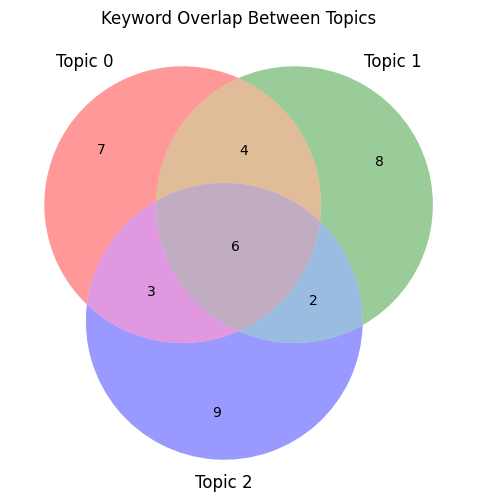

In [22]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Extract keywords for each topic
topic_0_keywords = set(dict(lda_model.show_topic(0, topn=20)).keys())
topic_1_keywords = set(dict(lda_model.show_topic(1, topn=20)).keys())
topic_2_keywords = set(dict(lda_model.show_topic(2, topn=20)).keys())

# Create Venn Diagram
plt.figure(figsize=(8, 6))
venn3([topic_0_keywords, topic_1_keywords, topic_2_keywords], ('Topic 0', 'Topic 1', 'Topic 2'))
plt.title("Keyword Overlap Between Topics")
plt.show()


# **Conclusion**
This study provides a computational analysis of corporate perspectives on AI-driven automation and its implications for employment using topic modeling. The findings revealed several critical themes and insights:

- Workforce Reskilling and Upskilling: A dominant theme across the data highlighted the importance of preparing employees for the changing nature of work. The Word Cloud visualization vividly illustrated the prominence of terms like "upskilling," "reskilling," and "technology," emphasizing the collective focus on bridging skill gaps caused by AI integration.

- Challenges of Job Displacement: The topic modeling results, supported by the bar charts and intertopic distance maps, consistently showcased concerns about job losses due to automation. This underscores the urgency for strategies to manage workforce transitions and mitigate societal impacts.

- Opportunities for Task Augmentation: The visual representation of keyword relationships revealed how terms associated with augmentation and productivity are closely linked with innovation, portraying AI as a tool to enhance human capabilities. This was further supported by the clustering of documents emphasizing task augmentation as a central theme.

- Organizational Responsibilities: The Venn diagram of keyword overlaps highlighted the shared focus on organizational strategies across topics, emphasizing continuous learning and fair workforce practices as essential to navigating AI-driven transformations.

By employing topic modeling, this research offers a replicable framework for extracting key themes from complex text data. The findings align with existing literature, reaffirming the dual narrative of AI's potential benefits and challenges. The analysis provides actionable insights for policymakers and organizations to address skill mismatches, support reskilling initiatives, and promote sustainable growth.


# **References**


Deloitte Digital. (2024, April 9). AI Can Cut Costs: But at What Cost to the Workforce Experience? https://www.deloittedigital.com/nl/en/insights/perspective/ai-can-cut-costs.html

Deloitte UK. (2024). AI-Powered Employee Experience: How Organisations Can Unlock Higher Engagement and Productivity. https://www.deloitte.com/uk/en/services/consulting/blogs/2024/ai-powered-employee-experience.html

EY. (2023). How Artificial Intelligence Can Augment a People-Centered Workforce. https://www.ey.com/en_gl/insights/workforce/how-artificial-intelligence-can-augment-a-people-centered-workforce

Kedia, A., & Rasu, M. (2020). Hands-on Python natural language processing: Explore tools and techniques to analyze and process text with a view to building real-world NLP applications. Packt Publishing.

KPMG. (2023, June). Generative AI and the UK Labour Market. https://kpmg.com/uk/en/home/insights/2023/06/generative-ai-and-the-uk-labour-market.html

KPMG UK. (2023, December). AI and Employment Law: 6 Key Considerations. https://kpmg.com/uk/en/home/insights/2023/12/ai-and-employment-law-6-key-considerations.html

Lane, M., Williams, M., & Broecke, S. (2023). The impact of AI on the workplace: Main findings from the OECD AI surveys of employers and workers. OECD Social, Employment and Migration Working Papers, No. 288. Organisation for Economic Co-operation and Development.

McKinsey & Company. (n.d.). AI, automation, and the future of work: Ten things to solve for. Retrieved December 16, 2024, from https://www.mckinsey.com/featured-insights/future-of-work/ai-automation-and-the-future-of-work-ten-things-to-solve-for

Neuendorf, K. A. (2017). The content analysis guidebook. SAGE Publications, Inc.

PwC. (2024). PwC's 2024 AI Jobs Barometer. https://www.pwc.com/gx/en/issues/artificial-intelligence/job-barometer/report.pdf

World Economic Forum & PwC. (2024, November). Leveraging Generative AI for Job Augmentation and Workforce Productivity: Scenarios, Case Studies and a Framework for Action. https://www.pwc.com/gx/en/issues/artificial-intelligence/wef-leveraging-generative-ai-for-job-augmentation-and-workforce-productivity-2024.pdf